# Forward Stepwise Selection

While best subset selection is quite aggressive and looks at all possible subsets,
forward stepwise is a greedy algorithm, each time it includes the next best variable,
but it produces a nested sequence.

In [16]:
library(ISLR)
View(Hitters)
names(Hitters)
dim(Hitters)
sum(is.na(Hitters$Salary))

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N


[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 322  20

[1] 59

In [17]:
Hitters <- na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))

[1] 263  20

[1] 0

In [18]:
# install.packages("leaps")
library(leaps)

In [20]:
# Use regsubsets with method = "forward"
regfit.fwd <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
# In this summary, each new model includes all of the variables from before, plus one new one.
summary(regfit.fwd)

regfit.bwd <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
summary(regfit.bwd)


Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


In [22]:
coef(regfit.fwd, 7)
coef(regfit.bwd, 7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

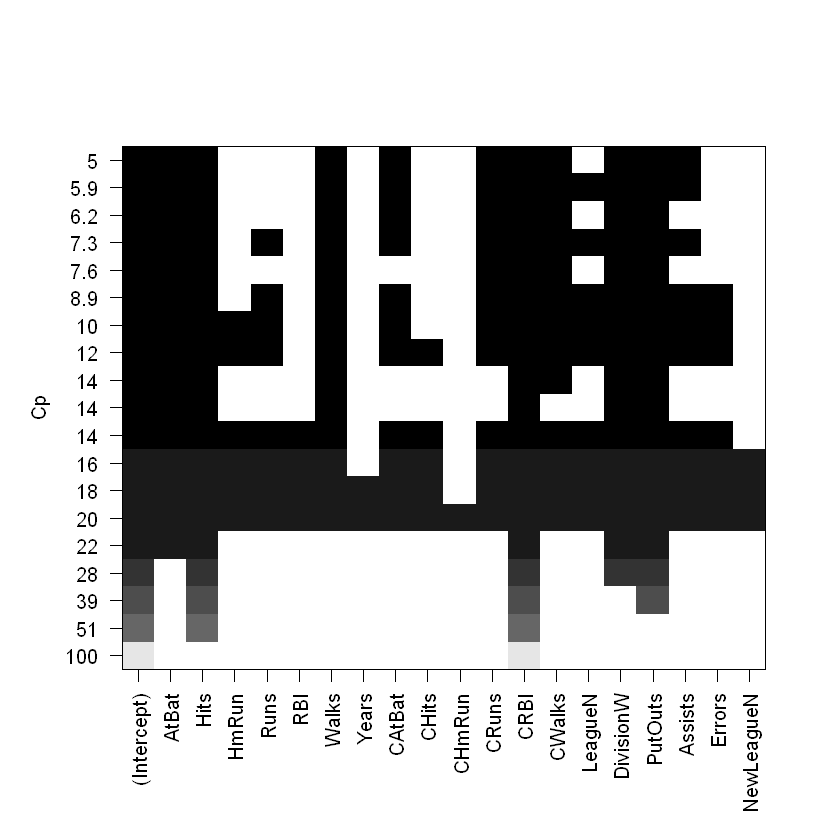

In [21]:
plot(regfit.fwd, scale = "Cp")

## Choosing Among Models Using the Validation-Set Approach and Cross-Validation

Let's make a training and validation set, so that we can choose a good subset model.
We will do it using a slightly different approach from what was done in the book.

In [30]:
# Pick a subset of the observations, put them aside and use them as a validation set.
set.seed(1)
dim(Hitters)
# Generates a random sample of size nrow(Hitters), where each element of the sample is either TRUE or FALSE.
# The c function in R stands for "combine". It is used to combine multiple elements into a single vector.
# Sampling with replacement means that when generating the random sample of TRUE and FALSE values
# using the sample function, it is possible for the same value to be selected multiple times.
train <- sample(c(TRUE, FALSE), nrow(Hitters), replace = TRUE)
test <- (!train)
length(train)
train
length(test)
test


[1] 263  20

[1] 263

[1]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE
 [37] FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [49]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
 [61]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [73]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
 [85]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [97]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[121] FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[133] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE
[145]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[157] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
[169]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
[181] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE
[193]  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
[205] FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[217]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE
[229]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE
[253]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE

[1] 263

[1] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE
 [13] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE
 [37]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49] FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE
 [61] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [73] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
 [85] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE
 [97] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
[109] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
[133]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE
[145] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
[157]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
[169] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[181]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE
[193] FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE
[205]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[217] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
[229] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[241]  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
[253] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE

In [31]:
regfit.best <- regsubsets(Salary ~ ., data = Hitters[train, ], nvmax = 19)

# Use data set hitters but indexed by the rows in train.
regfit.fwd <- regsubsets(Salary ~ ., data = Hitters[train, ], nvmax = 19, method = "forward")


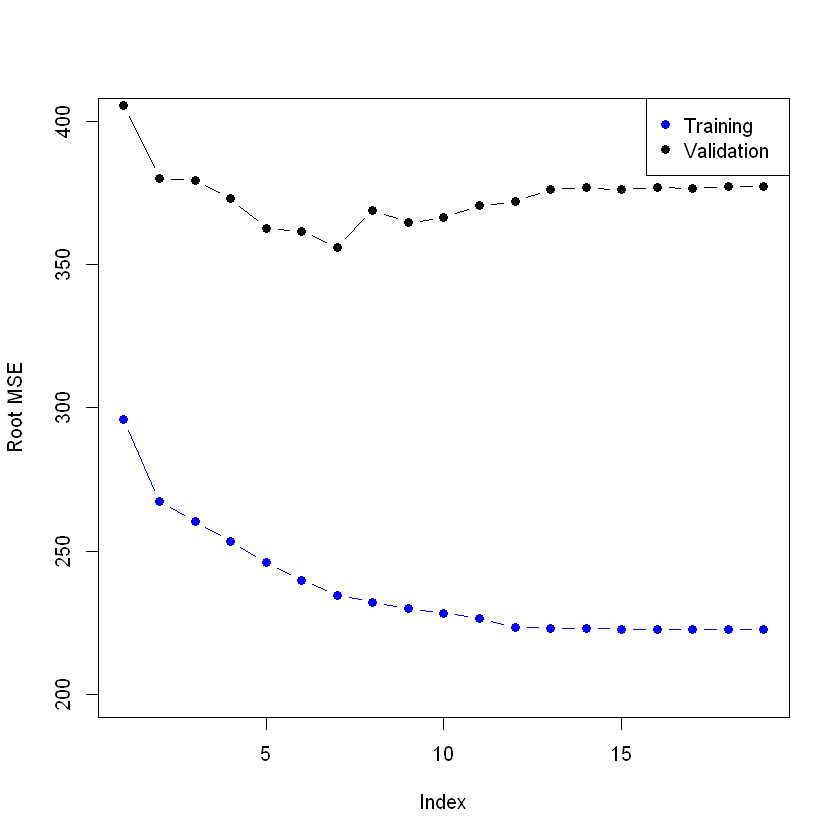

In [41]:
# Now we will make predictions on the observations not used for training.
# We know there are 19 models, so we set up some vectors to record the errors.
# We have to do a bit of work here, because there is no predict method for regsubsets.

# 19 subset models, because there are 19 variables. Set up a vector with 19 slots.
val.errors <- rep(NA, 19)

# Make an X matrix corresponding to validation data set. Salary ~ . means model salary as a function of all the other variables.
test.mat <- model.matrix(Salary ~ ., data = Hitters[test, ])

for (i in 1:19) {
    # Get coefficients for ith model
    coefi <- coef(regfit.fwd, id = i)

    # Index the columns by the names in the coefficient vector to get the subset of
    # columns of x.test that correspond to the variables that are in this current coefficient vector
    # and do a matrix multiplied by the coefficient vector.
    pred <- test.mat[, names(coefi)] %*% coefi

    # Compute the mean squared error.
    val.errors[i] <- mean((Hitters$Salary[test] - pred)^2)
}
plot(sqrt(val.errors), ylab = "Root MSE", ylim = c(200, 400), pch = 19, type = "b")
points(sqrt(regfit.fwd$rss[-1] / 180), col = "blue", pch = 19, type = "b")
# As we expect, the training error goes down monotonically as the model gets bigger, but not so for the validation error.
legend("topright", legend = c("Training", "Validation"), col = c("blue", "black"), pch = 19)


In [ ]:

# This was a little tedious - not having a predict method for `regsubsets`. So we will write one.

predict.regsubsets <- function(object, newdata, id, ...) {
    # reg subset objects got a component called a call that's the call
    # that was used to create it and part of the call is
    # a formula which we extract here.
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id = id)
    xvars <- names(coefi)
    mat[, xvars] %*% coefi
}